<font size=5>**Análise e Ciência de Dados - custo de plano de saúde por pessoa (parte 2)**</font>

---
---

In [1]:
from platform import platform, python_version
print('Platform:', platform())
print('Python version:', python_version())

Platform: Linux-6.1.85+-x86_64-with-glibc2.35
Python version: 3.10.12


In [48]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import itertools

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import (mean_absolute_error,
                             mean_squared_error,
                             r2_score)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

warnings.filterwarnings('ignore')
plt.style.use(style='ggplot')
%matplotlib inline

In [3]:
df = pd.read_csv(filepath_or_buffer='https://raw.githubusercontent.com/FGalvao77/datasets/main/insurance.csv')
df.shape

(1338, 7)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


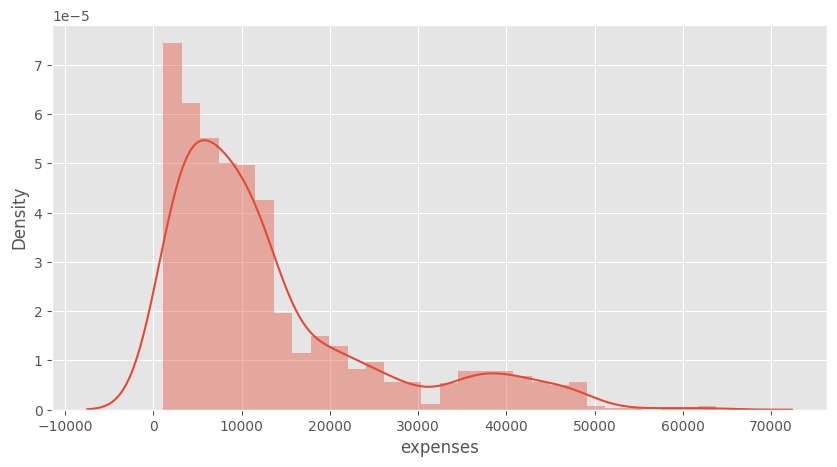

In [8]:
plt.figure(figsize=(10, 5))
sns.distplot(df['expenses'])
plt.show()

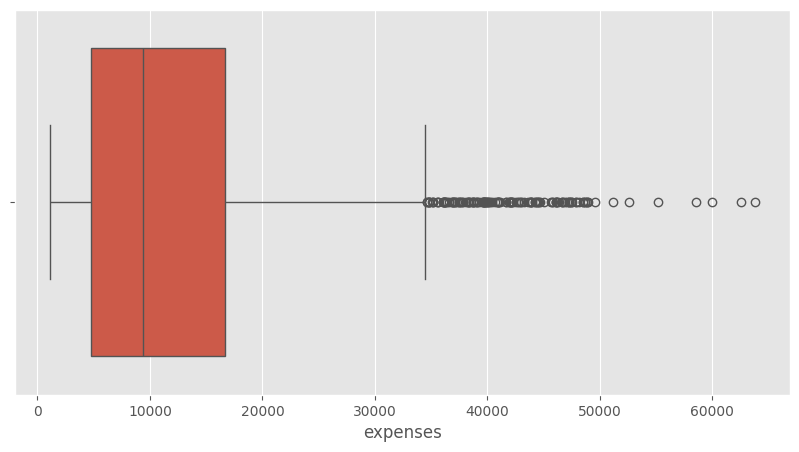

In [9]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['expenses'])
plt.show()

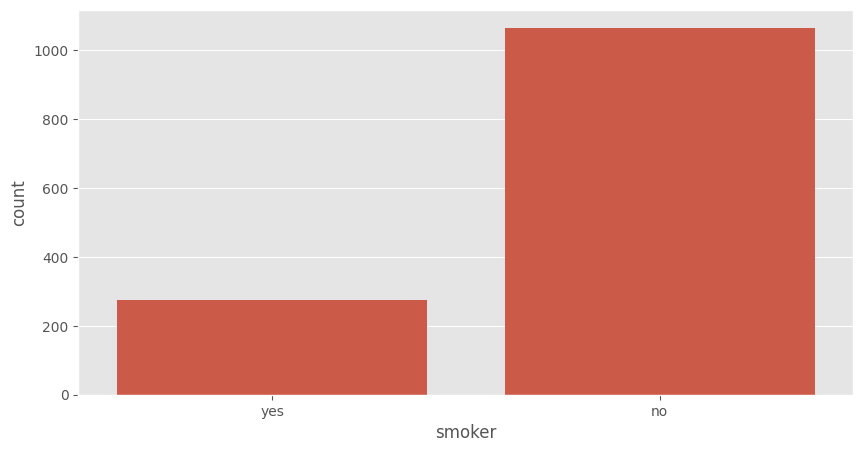

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['smoker'])
plt.show()

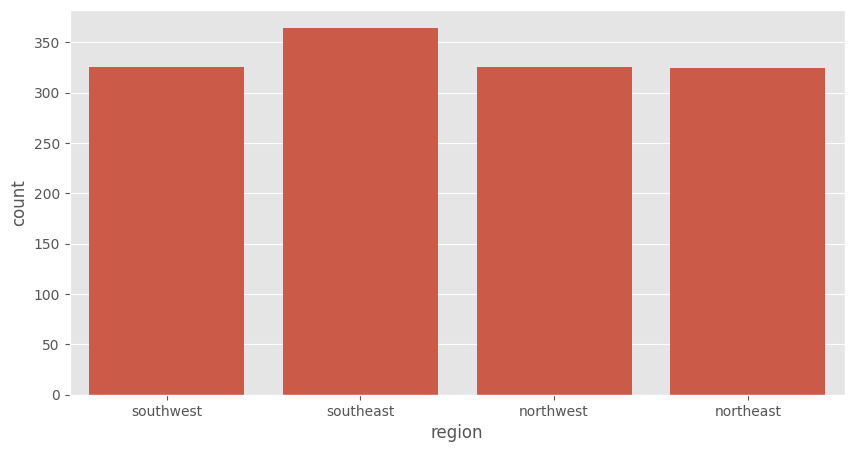

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['region'])
plt.show()

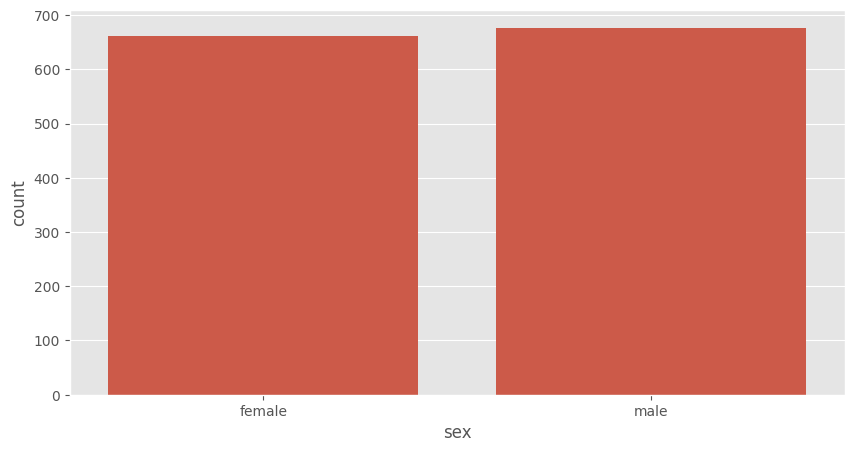

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['sex'])
plt.show()

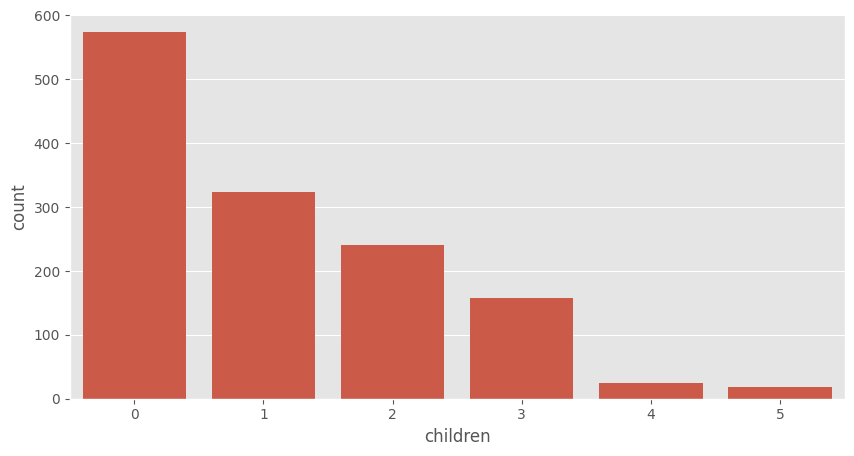

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['children'])
plt.show()

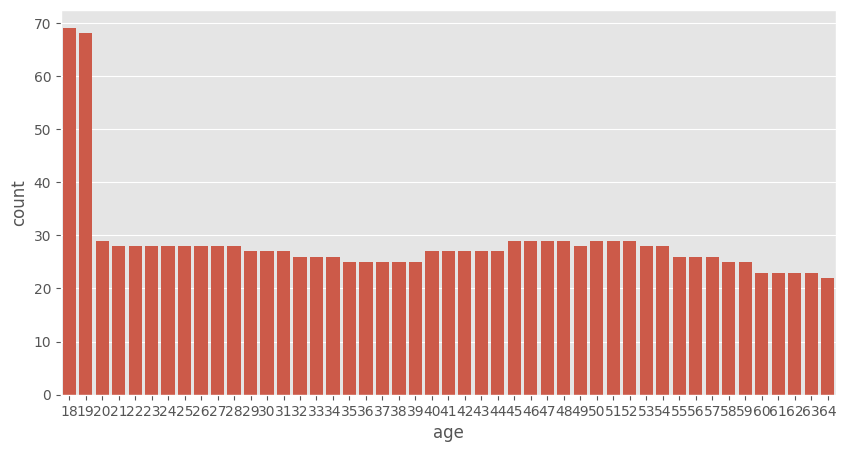

In [14]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['age'])
plt.show()

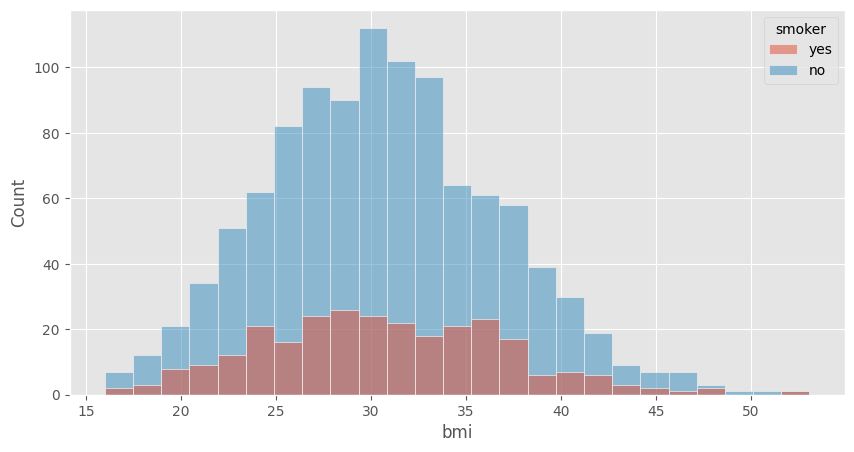

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(x=df['bmi'], hue=df['smoker'])
plt.show()

In [16]:
for sex in df['sex'].unique():
    print(sex, df[df['sex'] == sex]['smoker'].value_counts())

female smoker
no     547
yes    115
Name: count, dtype: int64
male smoker
no     517
yes    159
Name: count, dtype: int64


In [17]:
for region in df['region'].unique():
    print(region, df[df['region'] == region]['smoker'].value_counts())

southwest smoker
no     267
yes     58
Name: count, dtype: int64
southeast smoker
no     273
yes     91
Name: count, dtype: int64
northwest smoker
no     267
yes     58
Name: count, dtype: int64
northeast smoker
no     257
yes     67
Name: count, dtype: int64


In [18]:
for children in df['children'].unique():
    print(children, df[df['children'] == children]['smoker'].value_counts())

0 smoker
no     459
yes    115
Name: count, dtype: int64
1 smoker
no     263
yes     61
Name: count, dtype: int64
3 smoker
no     118
yes     39
Name: count, dtype: int64
2 smoker
no     185
yes     55
Name: count, dtype: int64
5 smoker
no     17
yes     1
Name: count, dtype: int64
4 smoker
no     22
yes     3
Name: count, dtype: int64


In [19]:
for age in df['age'].unique():
    print(age, df[df['age'] == age]['smoker'].value_counts())

19 smoker
no     50
yes    18
Name: count, dtype: int64
18 smoker
no     57
yes    12
Name: count, dtype: int64
28 smoker
no     25
yes     3
Name: count, dtype: int64
33 smoker
no     20
yes     6
Name: count, dtype: int64
32 smoker
no     21
yes     5
Name: count, dtype: int64
31 smoker
no     22
yes     5
Name: count, dtype: int64
46 smoker
no     24
yes     5
Name: count, dtype: int64
37 smoker
no     16
yes     9
Name: count, dtype: int64
60 smoker
no     18
yes     5
Name: count, dtype: int64
25 smoker
no     23
yes     5
Name: count, dtype: int64
62 smoker
no     19
yes     4
Name: count, dtype: int64
23 smoker
no     21
yes     7
Name: count, dtype: int64
56 smoker
no     22
yes     4
Name: count, dtype: int64
27 smoker
no     19
yes     9
Name: count, dtype: int64
52 smoker
no     23
yes     6
Name: count, dtype: int64
30 smoker
no     18
yes     9
Name: count, dtype: int64
34 smoker
no     21
yes     5
Name: count, dtype: int64
59 smoker
no     21
yes     4
Name: count, dtype

In [20]:
for smoker in df['smoker'].unique():
    print(smoker, df[df['smoker'] == smoker]['sex'].value_counts())

yes sex
male      159
female    115
Name: count, dtype: int64
no sex
female    547
male      517
Name: count, dtype: int64


In [21]:
for smoker in df['smoker'].unique():
    print(smoker, df[df['smoker'] == smoker]['region'].value_counts())

yes region
southeast    91
northeast    67
southwest    58
northwest    58
Name: count, dtype: int64
no region
southeast    273
northwest    267
southwest    267
northeast    257
Name: count, dtype: int64


In [22]:
for smoker in df['smoker'].unique():
    print(smoker, df[df['smoker'] == smoker]['children'].value_counts())

yes children
0    115
1     61
2     55
3     39
4      3
5      1
Name: count, dtype: int64
no children
0    459
1    263
2    185
3    118
4     22
5     17
Name: count, dtype: int64


In [23]:
for smoker in df['smoker'].unique():
    print(smoker, df[df['smoker'] == smoker]['age'].value_counts())

yes age
19    18
43    12
18    12
47    10
30     9
27     9
20     9
37     9
42     8
64     7
23     7
51     6
33     6
24     6
39     6
52     6
44     6
29     6
61     6
36     6
22     6
32     5
46     5
35     5
54     5
48     5
40     5
25     5
60     5
53     5
45     5
63     5
31     5
34     5
49     4
59     4
50     4
57     4
62     4
56     4
26     3
28     3
55     2
21     2
38     2
41     2
58     1
Name: count, dtype: int64
no age
18    57
19    50
21    26
26    25
28    25
41    25
50    25
48    24
45    24
46    24
58    24
55    24
49    24
54    23
25    23
38    23
52    23
53    23
51    23
57    22
22    22
40    22
24    22
31    22
56    22
59    21
32    21
29    21
44    21
23    21
34    21
20    20
33    20
35    20
39    19
36    19
27    19
47    19
42    19
62    19
30    18
63    18
60    18
61    17
37    16
43    15
64    15
Name: count, dtype: int64


In [24]:
for smoker in df['smoker'].unique():
    print(smoker, df[df['smoker'] == smoker]['bmi'].value_counts())

yes bmi
28.3    6
29.8    5
31.4    4
32.8    4
35.5    4
       ..
47.4    1
41.9    1
30.3    1
23.2    1
40.4    1
Name: count, Length: 161, dtype: int64
no bmi
33.3    16
27.6    15
32.3    14
28.9    14
24.3    11
        ..
29.1     1
40.6     1
44.8     1
46.7     1
53.1     1
Name: count, Length: 261, dtype: int64


In [25]:
for smoker in df['smoker'].unique():
    print(smoker, df[df['smoker'] == smoker]['expenses'].value_counts())

yes expenses
16884.92    1
17496.31    1
47462.89    1
19933.46    1
39047.29    1
           ..
22144.03    1
19521.97    1
25382.30    1
28868.66    1
29141.36    1
Name: count, Length: 274, dtype: int64
no expenses
1639.56     2
1725.55     1
8891.14     1
2690.11     1
26140.36    1
           ..
11840.78    1
10601.41    1
7682.67     1
10381.48    1
2007.95     1
Name: count, Length: 1063, dtype: int64


In [26]:
for smoker in df['smoker'].unique():
    print(smoker, df[df['smoker'] == smoker]['sex'].value_counts())

yes sex
male      159
female    115
Name: count, dtype: int64
no sex
female    547
male      517
Name: count, dtype: int64


In [27]:
for smoker in df['smoker'].unique():
    print(smoker, df[df['smoker'] == smoker]['region'].value_counts())

yes region
southeast    91
northeast    67
southwest    58
northwest    58
Name: count, dtype: int64
no region
southeast    273
northwest    267
southwest    267
northeast    257
Name: count, dtype: int64


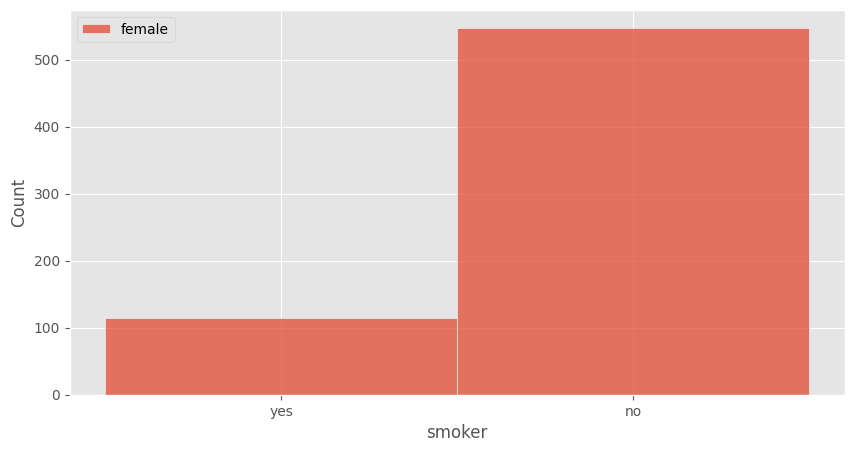

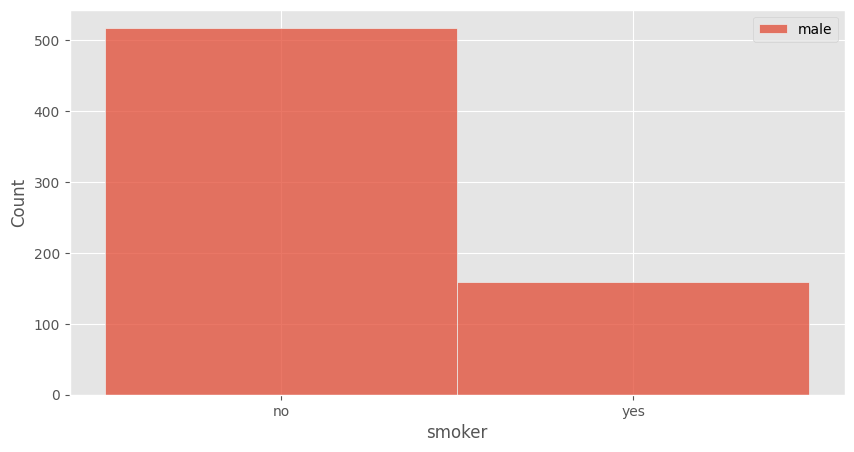

In [28]:
for sex in df['sex'].unique():
    plt.figure(figsize=(10, 5))
    sns.histplot(df[df['sex'] == sex]['smoker'], label=sex) # Pass the counts as the data and use label for the sex
    plt.legend() # Display the legend to distinguish between sexes
    plt.show()

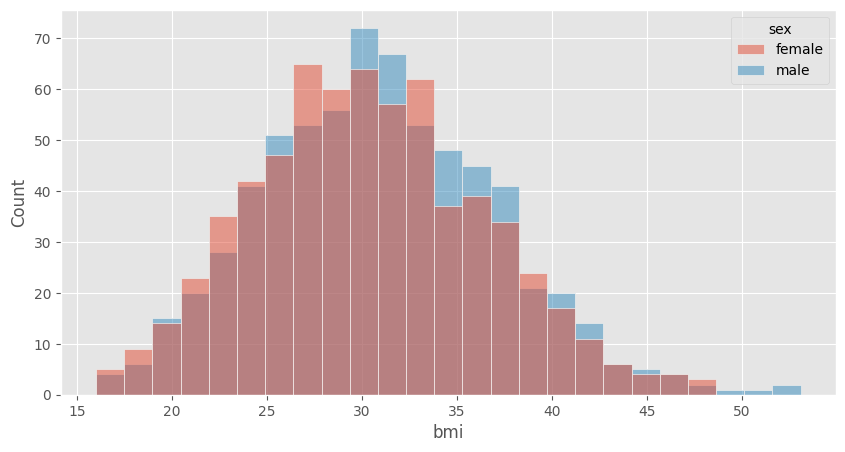

In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(x=df['bmi'], hue=df['sex'])
plt.show()

In [30]:
for region in df['region'].unique():
    print(region, df[df['region'] == region]['smoker'].value_counts())

southwest smoker
no     267
yes     58
Name: count, dtype: int64
southeast smoker
no     273
yes     91
Name: count, dtype: int64
northwest smoker
no     267
yes     58
Name: count, dtype: int64
northeast smoker
no     257
yes     67
Name: count, dtype: int64


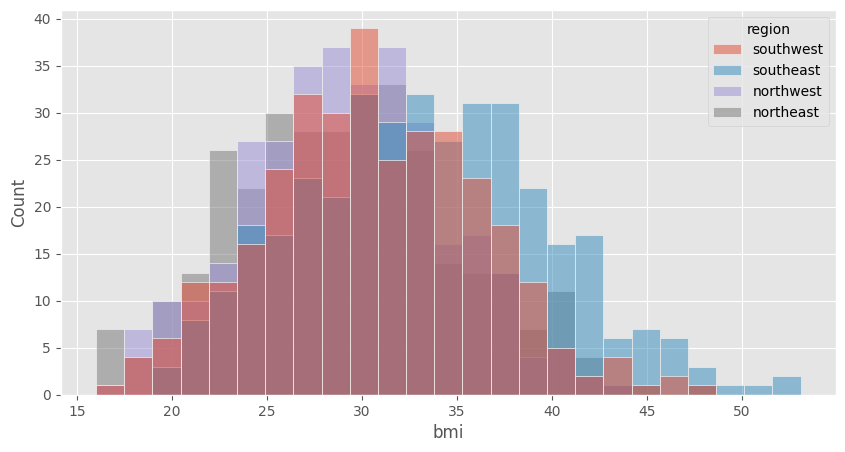

In [31]:
plt.figure(figsize=(10, 5))
sns.histplot(x=df['bmi'], hue=df['region'])
plt.show()

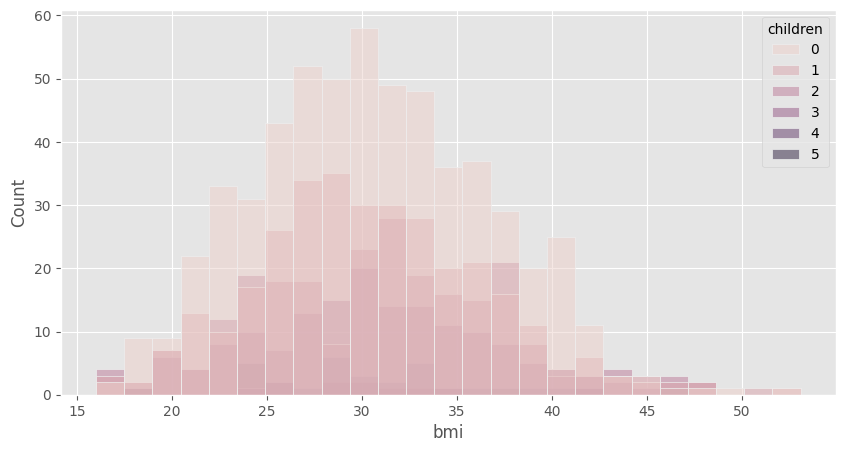

In [32]:
plt.figure(figsize=(10, 5))
sns.histplot(x=df['bmi'], hue=df['children'])
plt.show()

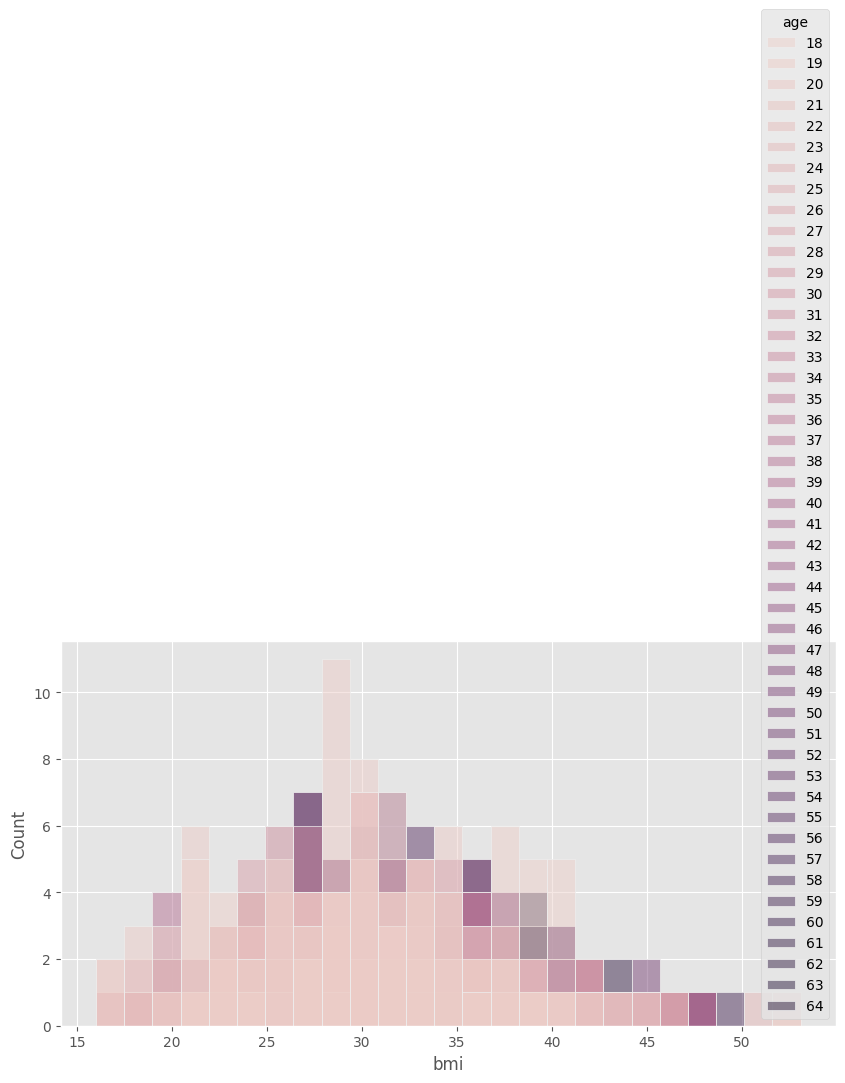

In [33]:
plt.figure(figsize=(10, 5))
sns.histplot(x=df['bmi'], hue=df['age'])
plt.show()

In [34]:
for smoker in df['smoker'].unique():
    print(smoker, df[df['smoker'] == smoker]['sex'].value_counts())

yes sex
male      159
female    115
Name: count, dtype: int64
no sex
female    547
male      517
Name: count, dtype: int64


In [35]:
cat_vars = df.select_dtypes(include=['object']).columns
cat_vars

Index(['sex', 'smoker', 'region'], dtype='object')

In [36]:
df2 = df.copy()
df2[cat_vars] = df2[cat_vars].astype('category')

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   expenses  1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.3 KB


In [37]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [38]:
df2.select_dtypes(exclude=['category']).corr()['expenses']

age         0.299008
bmi         0.198576
children    0.067998
expenses    1.000000
Name: expenses, dtype: float64

In [39]:
df2.select_dtypes(exclude=['category']).corr().style.background_gradient(cmap='coolwarm')

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


In [40]:
df2.select_dtypes(include=['category']).describe().T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [41]:
X = df2.drop(columns=['expenses'])
y = df2['expenses']

In [42]:
X.shape, y.shape

((1338, 6), (1338,))

In [43]:
features_cat = X.select_dtypes(include=['category']).columns
features_cat

Index(['sex', 'smoker', 'region'], dtype='object')

In [44]:
features_num = X.select_dtypes(exclude=['category']).columns
features_num

Index(['age', 'bmi', 'children'], dtype='object')

In [45]:
X.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [46]:
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [47]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_pipeline, features_num),
    ('cat', cat_pipeline, features_cat)
])

In [49]:
filename = 'model/finalized_model.sav'
filename

'model/finalized_model.sav'

In [50]:
model = pickle.load(open(filename, 'rb'))
model

RandomForestRegressor(criterion='friedman_mse', max_features='auto',
                      min_samples_leaf=16, min_samples_split=5, n_jobs=-1,
                      random_state=969)

In [51]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [53]:
pipeline.fit(X=X_train, y=y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'bmi', 'children'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['sex', 'smoker', 'region'], dtype='object'))])),
                ('model',
                 RandomForestRegressor(criterion='friedman_mse',
                                       max_features='auto', min_samples_leaf=16,
                                       min_samples_split=5, n_jobs=-1,
                                       random_state=969))])

In [54]:
X.iloc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [55]:
pipeline.predict(X.iloc[[0]])

array([19073.32865677])

In [56]:
y.iloc[0]

16884.92

In [57]:
y_pred = pipeline.predict(X_test)

In [58]:
y_pred[:5]

array([10295.48212356,  5618.35774224, 25414.96400616, 10006.17960899,
       36163.08204411])

In [59]:
y_test[:5]

764      9095.07
887      5272.18
890     29330.98
1293     9301.89
259     33750.29
Name: expenses, dtype: float64

In [60]:
X.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [62]:
ages = list(range(18, 86))
sex = ['male', 'female']
# bmi = [18.5, 25, 30, 35, 40]
bmi = list(np.arange(16, 53.2, 0.1))
# children = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
children = list(range(0, 6))
smoker = ['yes', 'no']
regions = ['northwest', 'northeast', 'southeast', 'southwest']

In [63]:
combinations = list(itertools.product(ages, sex, bmi, children, smoker, regions))
len(combinations), combinations[:5]

(2428416,
 [(18, 'male', 16.0, 0, 'yes', 'northwest'),
  (18, 'male', 16.0, 0, 'yes', 'northeast'),
  (18, 'male', 16.0, 0, 'yes', 'southeast'),
  (18, 'male', 16.0, 0, 'yes', 'southwest'),
  (18, 'male', 16.0, 0, 'no', 'northwest')])

In [64]:
df_comb = pd.DataFrame(data=combinations,
                       columns=['age', 'sex', 'bmi',
                                'children', 'smoker', 'region'])
df_comb.shape

(2428416, 6)

In [65]:
df_comb.head()

,age,sex,bmi,children,smoker,region
0,18,male,16.0,0,yes,northwest
1,18,male,16.0,0,yes,northeast
2,18,male,16.0,0,yes,southeast
3,18,male,16.0,0,yes,southwest
4,18,male,16.0,0,no,northwest


In [66]:
df_comb.tail()

,age,sex,bmi,children,smoker,region
2428411,85,female,53.1,5,yes,southwest
2428412,85,female,53.1,5,no,northwest
2428413,85,female,53.1,5,no,northeast
2428414,85,female,53.1,5,no,southeast
2428415,85,female,53.1,5,no,southwest


In [67]:
predictions = pipeline.predict(df_comb)

In [68]:
df_comb['predictions_expenses'] = predictions

In [69]:
df_comb.head(n=15)

,age,sex,bmi,children,smoker,region,predictions_expenses
0,18,male,16.0,0,yes,northwest,16759.144600
1,18,male,16.0,0,yes,northeast,16759.144600
2,18,male,16.0,0,yes,southeast,16759.144600
3,18,male,16.0,0,yes,southwest,16759.144600
4,18,male,16.0,0,no,northwest,1880.646518
5,18,male,16.0,0,no,northeast,2285.448925
6,18,male,16.0,0,no,southeast,1993.104870
7,18,male,16.0,0,no,southwest,1879.684234
8,18,male,16.0,1,yes,northwest,16759.144600
9,18,male,16.0,1,yes,northeast,16759.144600


In [70]:
df_comb.tail(n=15)

,age,sex,bmi,children,smoker,region,predictions_expenses
2428401,85,female,53.1,4,yes,northeast,46712.027398
2428402,85,female,53.1,4,yes,southeast,46712.027398
2428403,85,female,53.1,4,yes,southwest,46712.027398
2428404,85,female,53.1,4,no,northwest,17291.693925
2428405,85,female,53.1,4,no,northeast,17291.693925
2428406,85,female,53.1,4,no,southeast,17416.981770
2428407,85,female,53.1,4,no,southwest,17325.565505
2428408,85,female,53.1,5,yes,northwest,46712.027398
2428409,85,female,53.1,5,yes,northeast,46712.027398
2428410,85,female,53.1,5,yes,southeast,46712.027398


In [71]:
# verificando se há valores negativos na coluna "predictions_expenses"
df_comb[df_comb['predictions_expenses'] < 0]

,age,sex,bmi,children,smoker,region,predictions_expenses


In [72]:
min(df_comb['predictions_expenses']), max(df_comb['predictions_expenses'])

(1719.3865967517777, 46778.83861683935)

In [73]:
min(df['expenses']), max(df['expenses'])

(1121.87, 63770.43)

In [74]:
min_value = min(df['expenses'])
max_value = max(df['expenses'])

min_value, max_value

(1121.87, 63770.43)

In [75]:
# df_comb['predictions_expenses'] = df_comb['predictions_expenses'].apply(lambda x: 0 if x < 0 else x)
# df_comb['predictions_expenses'] = df_comb['predictions_expenses'].apply(lambda x: min_value if x < 0 else x)

In [76]:
df_comb['predictions_expenses'].describe()

count    2.428416e+06
mean     2.378388e+04
std      1.464231e+04
min      1.719387e+03
25%      1.188638e+04
50%      1.731373e+04
75%      4.148430e+04
max      4.677884e+04
Name: predictions_expenses, dtype: float64

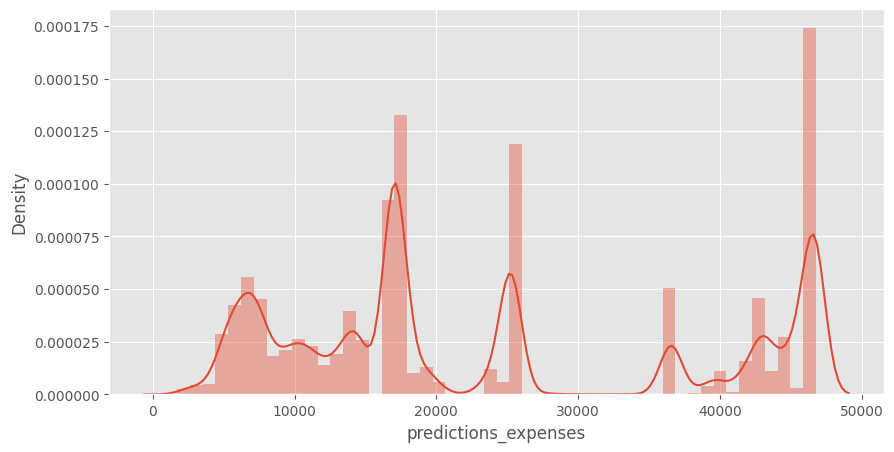

In [77]:
plt.figure(figsize=(10, 5))
sns.distplot(df_comb['predictions_expenses'])
plt.show()

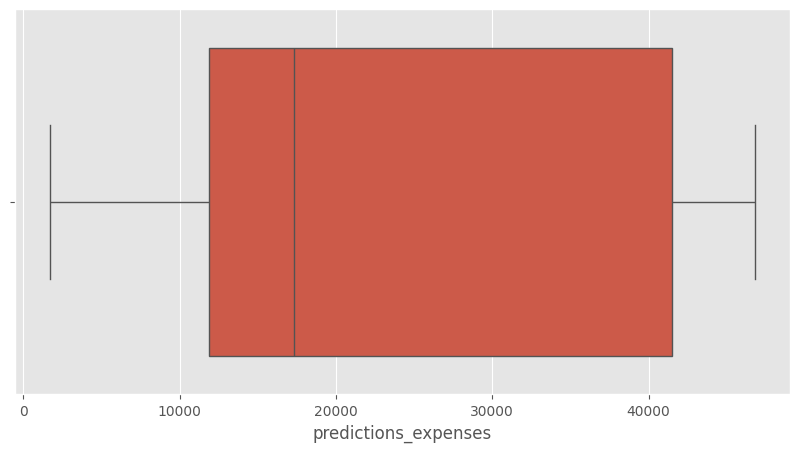

In [78]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_comb['predictions_expenses'])
plt.show()